In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
import pandas as pd 
from sklearn.linear_model import LinearRegression


In [31]:
data = pd.read_csv("./number of travelers.csv")

In [32]:
data.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


# transformation de  la col ‘time’ en format date

In [33]:
data["month"] = pd.to_datetime(data["month"])

# extraire le nom du mois sur une nouvelle colonne nommée “month_name”

In [35]:
data["month_name"] = data["month"].dt.month_name()

In [36]:
data.head(20)

,month,passengers,month_name
0,2000-01-01,46492,January
1,2000-02-01,48526,February
2,2000-03-01,58764,March
3,2000-04-01,56033,April
4,2000-05-01,58201,May
5,2000-06-01,61073,June
6,2000-07-01,62582,July
7,2000-08-01,61355,August
8,2000-09-01,52222,September
9,2000-10-01,56555,October


# transformation de  la nouvelle colonne(‘month_name’) grâce au one-hot encoding 

In [37]:
one_hot_encoded = pd.get_dummies(data["month_name"])
data_encoded = pd.concat([data , one_hot_encoded], axis = 1 )

# Normalisation des données 

In [38]:
mean = data_encoded["passengers"].mean()
std = data_encoded["passengers"].std()

data_encoded["passengers"] = (data_encoded["passengers"] - mean) / std
data_encoded["passengers"].head()

0   -1.820131
1   -1.585390
2   -0.403839
3   -0.719020
4   -0.468814
Name: passengers, dtype: float64

# Split de la Data Frame 


In [50]:
df_train = data_encoded.loc[: 75]
df_test = data_encoded.loc[76:]

In [51]:
x_train = df_train.drop(["month", "month_name", "passengers"], axis=1)
y_train = df_train["passengers"]

In [52]:
x_test = df_test.drop(["month", "month_name", "passengers"], axis=1)
y_test = df_test["passengers"]

In [53]:
model = LinearRegression()

In [54]:
model.fit(x_train, y_train)


LinearRegression()

In [61]:
predictions = model.predict(x_test)
train_predictions = model.predict(x_train)

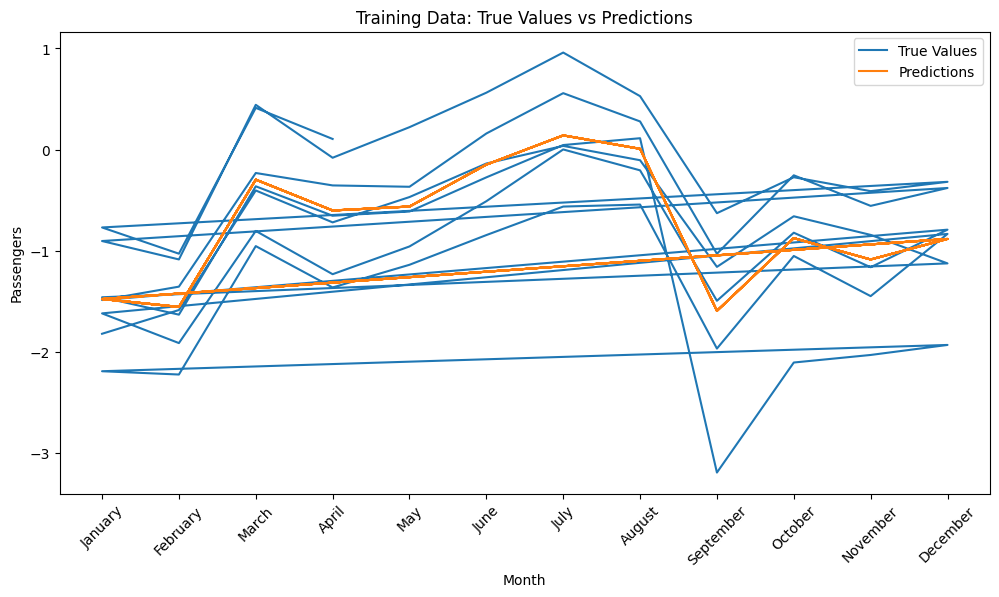

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df_train["month_name"], y_train, label="True Values")
plt.plot(df_train["month_name"], train_predictions, label="Predictions")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Training Data: True Values vs Predictions")
plt.legend()
plt.xticks(rotation=45)
plt.show()